**PREDICTING THE NUMBER OF 4s IN IPL MATCHES**

**LOADING AND CLEANING THE DATA**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('IPL_2023.csv')

In [3]:
df.head()


,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,Faf Du Plessis\nRCB,14,14,1,730,84,56.15,475,153.68,0,8,60,36
1,2,Shubman Gill\nGT,14,14,2,680,104*,56.67,446,152.46,2,4,67,22
2,3,Virat Kohli\nRCB,14,14,2,639,101*,53.25,457,139.82,2,6,65,16
3,4,Yashasvi Jaiswal\nRR,14,14,1,625,124,48.08,382,163.61,1,5,82,26
4,5,Devon Conway\nCSK,14,13,2,585,92*,53.18,422,138.62,0,6,69,16


In [4]:
df.isnull().sum()

POS       0
Player    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Avg       0
BF        0
SR        0
100       0
50        0
4s        0
6s        0
dtype: int64

In [5]:
df=df.replace('-','0')

In [6]:
#to seperate player name and team name
plyrs=[]
teams=[]
for player in list(df['Player']):
    fields=player.split('\n')
    plyrs.append(fields[0])
    teams.append(fields[1])
df['Player']=plyrs
df.insert(2, 'Team',teams)

In [7]:
#to seperate highest score and not out
HS_num=[]
HS_NO=[]
for score in list(df['HS']):
    if score.endswith('*'): 
        HS_NO.append(True)
    else:
        HS_NO.append(False)
    fields=score.split('*')
    HS_num.append(fields[0])
df.insert(8, 'HS_num',HS_num)
df['HS_num']=df['HS_num'].astype('int')
df.insert(9, 'HS_NO',HS_NO)

In [8]:
df

,POS,Player,Team,Mat,Inns,NO,Runs,HS,HS_num,HS_NO,Avg,BF,SR,100,50,4s,6s
0,1,Faf Du Plessis,RCB,14,14,1,730,84,84,False,56.15,475,153.68,0,8,60,36
1,2,Shubman Gill,GT,14,14,2,680,104*,104,True,56.67,446,152.46,2,4,67,22
2,3,Virat Kohli,RCB,14,14,2,639,101*,101,True,53.25,457,139.82,2,6,65,16
3,4,Yashasvi Jaiswal,RR,14,14,1,625,124,124,False,48.08,382,163.61,1,5,82,26
4,5,Devon Conway,CSK,14,13,2,585,92*,92,True,53.18,422,138.62,0,6,69,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,159,Yudhvir Singh,LSG,3,2,0,1,1,1,False,0.50,2,50.00,0,0,0,0
159,160,Noor Ahmad,GT,10,2,0,1,1,1,False,0.50,4,25.00,0,0,0,0
160,161,Fazalhaq Farooqi,SRH,4,1,1,1,1*,1,True,0,5,20.00,0,0,0,0
161,162,Nathan Ellis,PBKS,10,2,0,1,1,1,False,0.50,7,14.28,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POS     163 non-null    int64  
 1   Player  163 non-null    object 
 2   Team    163 non-null    object 
 3   Mat     163 non-null    int64  
 4   Inns    163 non-null    int64  
 5   NO      163 non-null    int64  
 6   Runs    163 non-null    int64  
 7   HS      163 non-null    object 
 8   HS_num  163 non-null    int64  
 9   HS_NO   163 non-null    bool   
 10  Avg     163 non-null    object 
 11  BF      163 non-null    int64  
 12  SR      163 non-null    float64
 13  100     163 non-null    int64  
 14  50      163 non-null    int64  
 15  4s      163 non-null    int64  
 16  6s      163 non-null    int64  
dtypes: bool(1), float64(1), int64(11), object(4)
memory usage: 20.7+ KB


In [10]:
df['Avg'] = df['Avg'].astype('float64')


**ANALYSIS**

<Axes: >

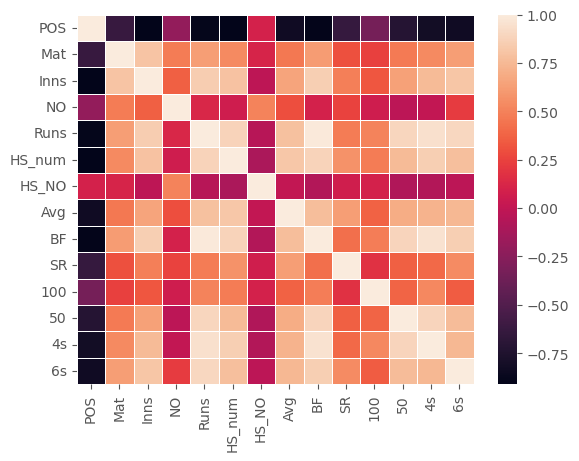

In [11]:
cor=df[['POS','Mat','Inns','NO','Runs','HS_num','HS_NO','Avg','BF','SR','100','50','4s','6s']].corr()
sns.heatmap(cor,cbar=True,linewidth=0.5)

In [12]:
cor_4s=cor['4s'].sort_values(ascending=False)
print(cor_4s)

4s        1.000000
BF        0.949104
Runs      0.946171
50        0.886954
HS_num    0.855627
Inns      0.759598
6s        0.739856
Avg       0.717609
Mat       0.536266
100       0.527596
SR        0.400501
NO        0.003277
HS_NO    -0.073052
POS      -0.819813
Name: 4s, dtype: float64


The number of 4s scored has the greatest positive correlation with total runs, balls faced, highest score and number of 50s

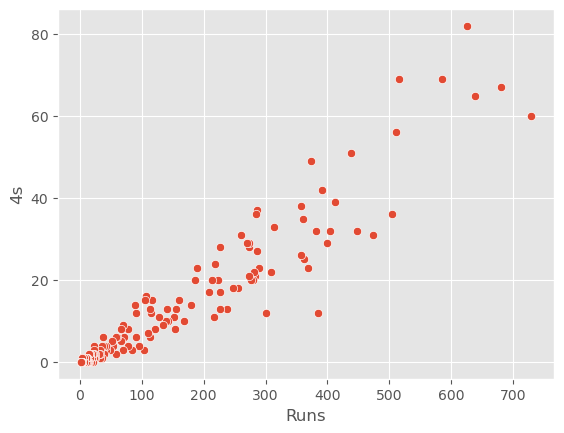

In [13]:
sns.scatterplot(x='Runs',y='4s',data=df)
plt.xlabel=("Total Runs")
plt.ylabel=("4s scored")
plt.show()


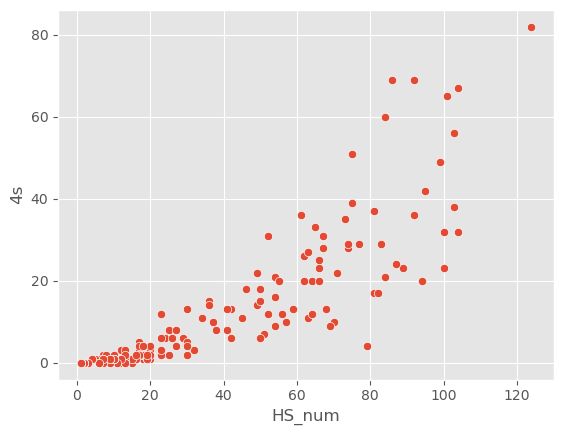

In [14]:
sns.scatterplot(x='HS_num',y='4s',data=df)
plt.xlabel=("Highest Score")
plt.ylabel=("4s scored")
plt.show()

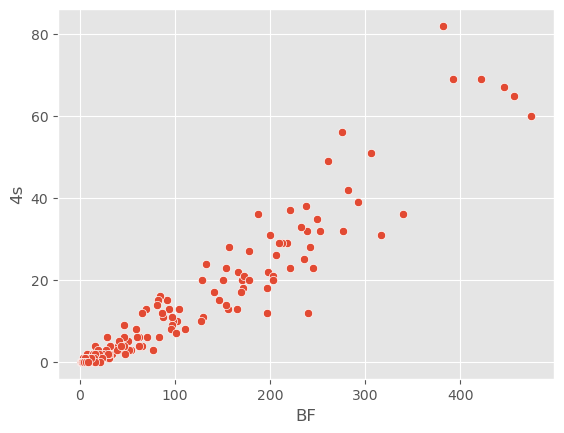

In [15]:
sns.scatterplot(x='BF',y='4s',data=df,)
plt.xlabel=("Balls Faced")
plt.ylabel=("4s scored")
plt.show()

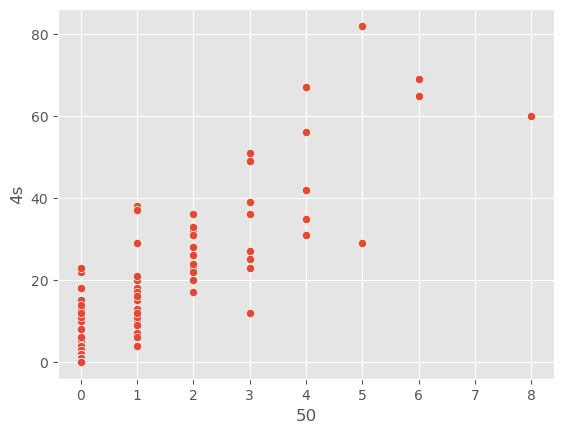

In [16]:
sns.scatterplot(x='50',y='4s',data=df,)
plt.xlabel=("50s scored")
plt.ylabel=("4s scored")
plt.show()

/Users/shravya/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shravya/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shravya/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shravya/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

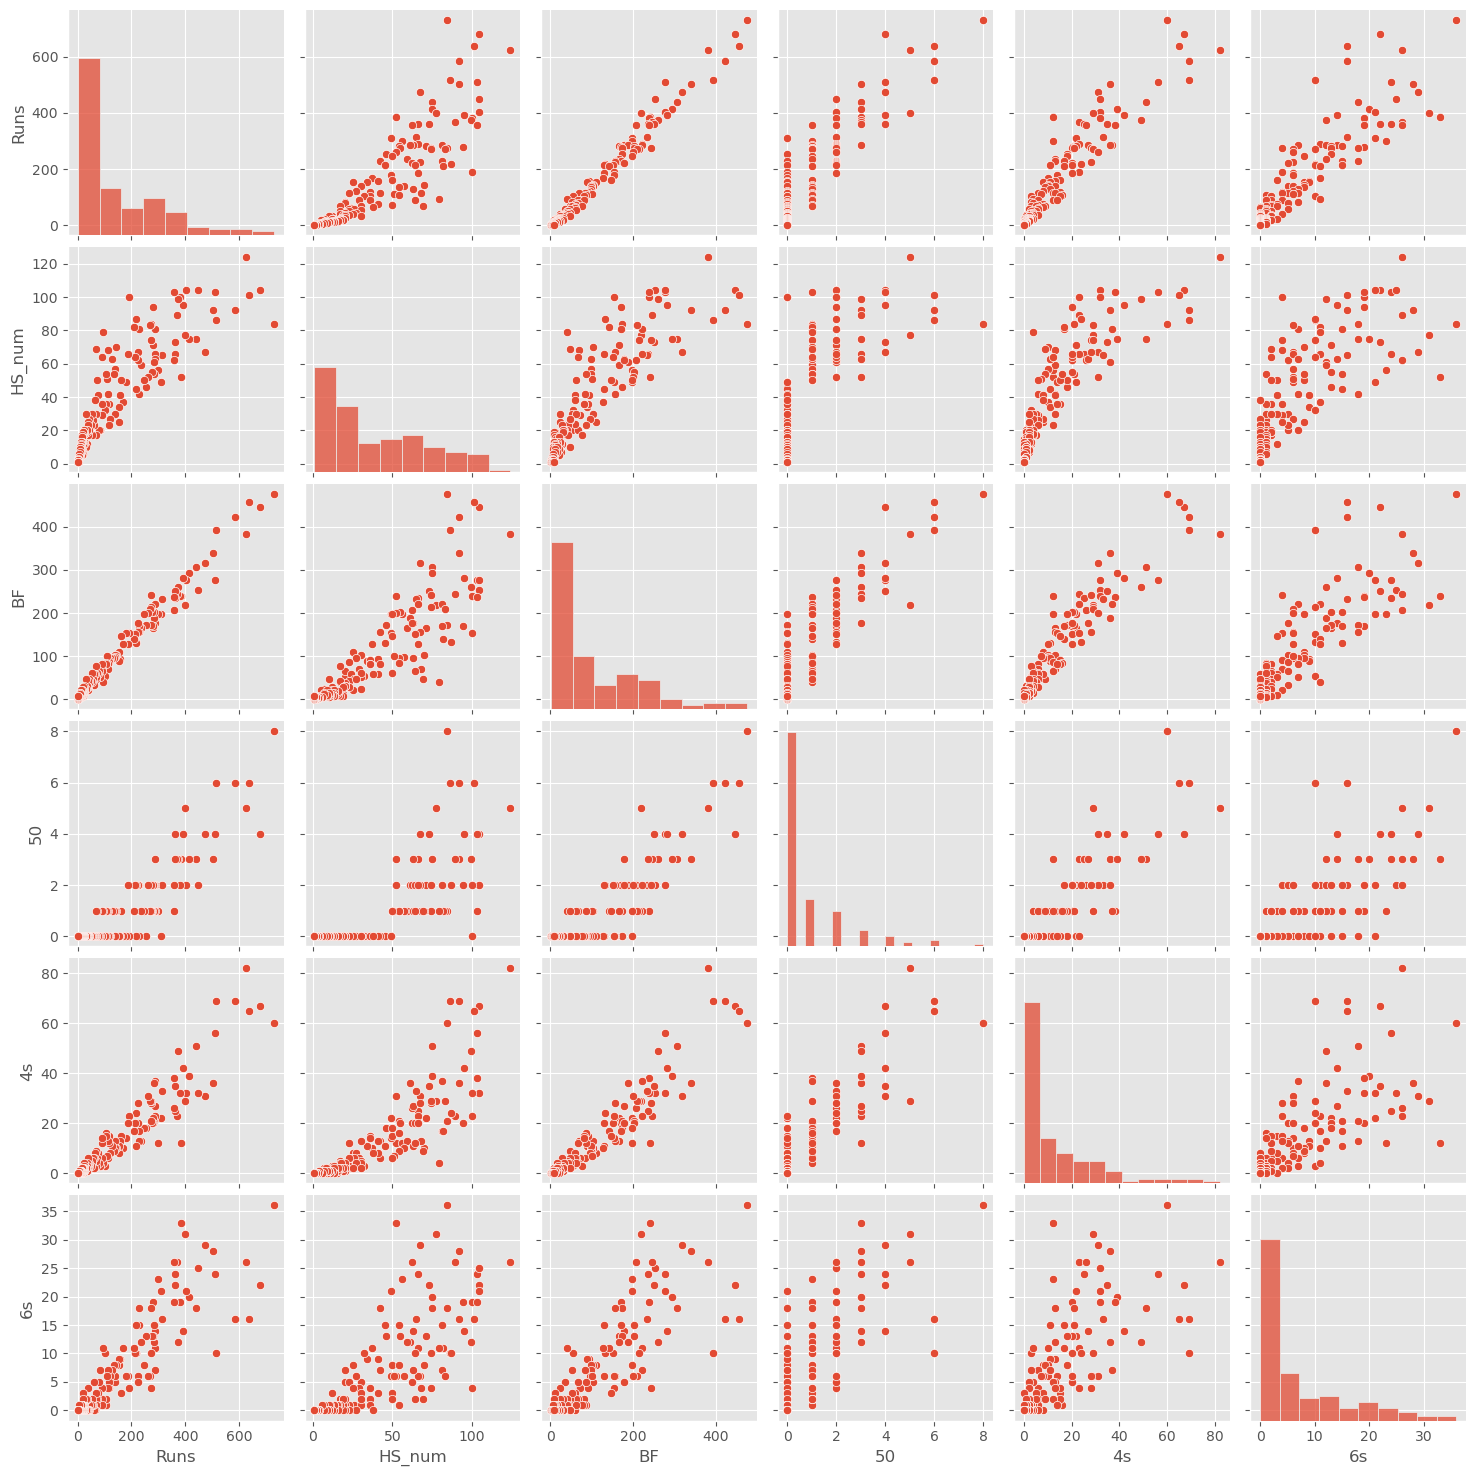

In [51]:
cols=['Runs','HS_num','BF','50','4s','6s']
sns.pairplot(df[cols],height=2.5)
plt.show()

In [17]:
reg_df=df


In [18]:
X = reg_df.drop(['4s','Player','HS'], axis=1)
y=reg_df['4s']


In [19]:
#Encoding Team names
from sklearn.preprocessing import LabelEncoder

X['Team']=LabelEncoder().fit_transform(X['Team'])
X_org=X

In [20]:
#Splitting into train and test dat

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:

X_train_sc=X_train
X_test_sc = X_test

LINEAR REGRESSION

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFE

model=LinearRegression()
model.fit(X_train_sc,y_train)
model.score(X_test_sc,y_test)



0.9489753632823724

In [23]:
model.coef_

array([ 0.00740271,  0.03051057,  0.02892648,  0.19494014, -0.36257385,
        0.25307204,  0.0612607 , -0.1541396 , -0.03340413, -0.15972634,
       -0.0045518 , -2.07368118,  1.14302104, -1.50027632])

In [24]:
train_preds = model.predict(X_train_sc)

err = mse(y_train,train_preds)
print('Traininig MSE :',err)

test_preds = model.predict(X_test_sc)

err = mse(y_test,test_preds)
print('Testing MSE :',err)


Traininig MSE : 7.207838487583786
Testing MSE : 9.716612432031285


Feature Selection

In [25]:
n_oflist=np.arange(1,10)
highscore=0
nof=0
score_list=[]
for n in range(len(n_oflist)):
    X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)
    model=LinearRegression()
    
    rfe=RFE(estimator=model, n_features_to_select= n_oflist[n])
    X_train_rfe=rfe.fit_transform(X_train,y_train)
    X_test_rfe=rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score=model.score(X_test_rfe,y_test)
    score_list.append(score)
    if score>highscore:
        highscore=score
        nof=n_oflist[n]
    

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" %(nof, highscore))


Optimum number of features: 7
Score with 7 features: 0.946894


In [44]:
rfe=RFE(estimator=model, n_features_to_select=7)
X_train_rfe=rfe.fit_transform(X_train,y_train)
X_test_rfe=rfe.transform(X_test)
model.fit(X_train_rfe,y_train)

print(rfe.support_)
print(X_train.columns)


[False False  True  True  True  True  True  True  True]
Index(['Mat', 'Inns', 'NO', 'Runs', 'HS_num', 'BF', '100', '50', '6s'], dtype='object')


In [46]:
fs=X[['NO', 'Runs', 'HS_num', 'BF', '100', '50', '6s']]

Linear Regression with Feature Selection

In [47]:
X_train, X_test, y_train, y_test= train_test_split(fs,y,test_size=0.3,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
print(model.score(X_test,y_test))

train_preds = model.predict(X_train)

err = mse(y_train,train_preds)
print('Training MSE :',err)

test_preds = model.predict(X_test)

err = mse(y_test,test_preds)
print('Testing MSE :',err)


0.9424063964855525
Training MSE : 7.610024541032671
Testing MSE : 10.967539602700024


After feature selection, it is observed that the MSE increases. So, I have reverted to using all columns for Linear Regression as well as all other models.

POLYNOMIAL REGRESSION

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
X=X_org


In [31]:
poly=PolynomialFeatures(degree=2, include_bias=True)
X_poly=poly.fit_transform(X)

In [32]:
X_train_poly, X_test_poly, y_train, y_test= train_test_split(X_poly,y,test_size=0.3,random_state=42)

In [33]:
from sklearn.metrics import r2_score
reg=LinearRegression()
reg.fit(X_train_poly, y_train)
pred_train=reg.predict(X_train_poly)
pred_test=reg.predict(X_test_poly)

mse_test=mse(y_test,pred_test)
mse_train=mse(y_train,pred_train)
print("Training MSE: "mse_train)
print("Validation MSE: "mse_test)

0.024316170873952665
230.69794239989156


The Validation MSE is very high for polynomail regression, and has a huge difference from training MSE.

DECISION TREE REGRESSION


In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
model=DecisionTreeRegressor(random_state=0)
model.fit(X_train,y_train)

pred_test=model.predict(X_test)
pred_train=model.predict(X_train)

mse_test=mse(y_test,pred_test)
mse_train=mse(y_train,pred_train)
print("Training MSE: "mse_train)
print("Validation MSE: "mse_test)


0.0
27.612244897959183


The training MSE is 0 as the decision tree regressor creates a new branch for each entry of the training data. However, the validation MSE is high as the testing data is unable to fit into the branches.

XGB MODEL

In [36]:
import xgboost as xg

In [37]:
model=xg.XGBRegressor(objective='reg:squarederror',n_estimators=10,seed=123)
model.fit(X_train,y_train)

pred_test=model.predict(X_test)
pred_train=model.predict(X_train)

mse_test=mse(y_test,pred_test)
mse_train=mse(y_train,pred_train)
print("Training MSE: "mse_train)
print("Validation MSE: "mse_test)



2.3259522314687158
25.53292566436066


While the training MSE is quite low, the validation MSE is high and the two have a huge difference.

RANDOM FOREST REGRESSION

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
model=RandomForestRegressor(n_estimators=10, random_state=0,oob_score=True)
model.fit(X_train,y_train)

pred_test=model.predict(X_test)
pred_train=model.predict(X_train)

mse_test=mse(y_test,pred_test)
mse_train=mse(y_train,pred_train)
print("Training MSE: "mse_train)
print("Validation MSE: "mse_test)

3.6780701754385965
32.75265306122449


/Users/shravya/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


The training MSE is low, but the validation MSE is high and the two have a large difference.

LASSO REGRESSION

In [40]:
from sklearn.linear_model import Lasso

In [41]:
model=Lasso(alpha=1.0)
model.fit(X_train,y_train)

pred_test=model.predict(X_test)
pred_train=model.predict(X_train)

mse_test=mse(y_test,pred_test)
mse_train=mse(y_train,pred_train)
print("Training MSE: "mse_train)
print("Validation MSE: "mse_test)

8.74146051063146
11.213982480812561


The MSE is quite low but not as low as Linear Regression.

**CONCLUSION**

After trying many approaches such as linear regression with and without feature selection, polynomial regression, decision tree regression, xgboost, Random Forest Regression and Lasso Regression, it is observed that Linear Regression(without feature selection) is the best-suited model. It has the lowest training MSE and validation MSE as well as the least difference between the two. 
The lowest test MSE achieved is 9.71.